### Cross-validation


We did not build any models in the previous topic. The reason for that is simple. Before creating any king of machine learning model, we must known what cross-validation is and how to choose the best cross-validation depending on your dataset.

So, what is cross-validation, and why should we care about it?

Mine is a one-liner: cross-validation is a step in the process of building a machine learning model which helps us ensure that our models fit the data accurately and also ensure that we do not overfit. But this leads to another term: overfitting.

To explain overfitting, i think it's best if we look at a dataset. There is a red wine-quality dataset which is quite famous. This dataset has 11 different attributes that decide the quality of red wine.



In [1]:
import pandas as pd
df = pd.read_csv("~/Downloads/winequality-red.csv")

In [4]:
#Let's take a look at the data

df.head(10) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


We can treat this problem either as a classification problem or as a regression problem since wine quality is nothing but a real number between 0 and 10. For simplicity, let's choose classification. 

In [7]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

This dataset, however, consists of only six types of quality values. We will thus map all quality values from 0 to 5.

In [8]:
# a mapping dictionary that maps the  quality values from 0 to 5.
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

# you can use the map function of pandas with any dictionary to covert the values in a given column to values in the dictionary
df.loc[:,"quality"] = df.quality.map(quality_mapping)

In [12]:
df.shape

(1599, 12)

Before we begin to understand what overfitting is, let's divide the data into two parts. This dataset has 1500 samples. We keep 1000 samples for training and 599 as a seprate set.

In [13]:
# use sample with frac=1 to shuffle the dataframe 
# we reset the indices since they change after 
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)

# top 1000 rows are selected for training 
df_train = df.head(1000)

# botton 599 values are selected for testing/validation
df_test = df.tail(599)

We will now train a decision tree model on the training set. For the decision tree model, I am going to use scikit-learn.


In [16]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth= 3)

# choose the columns you want to train on 
# these are the features for model
cols = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'
]

# train the mode on the provided features and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [18]:
#generating predictions on training set
train_pred = clf.predict(df_train[cols])

#generating predictions on test set
test_pred = clf.predict(df_test[cols])

#calculating acuracy of prediction on training dataset
train_accuracy = metrics.accuracy_score(df_train.quality, train_pred)

#calculating acuracy of prediction on test dataset
test_accuracy = metrics.accuracy_score(df_test.quality, test_pred)


In [21]:
train_accuracy

0.585

In [22]:
test_accuracy

0.5659432387312187

The training and test accuracies are found to be 58.5% and 56.6%. Now we increase the max_depth to 7 and repeat the process. We will get new accuracies.

In [23]:
# import  scikit-learn tree and metric
from sklearn import tree
from sklearn import metrics

# import matplotlib and seaborn for plotting
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

# this is our global size of label text on the plots
matplotlib.rc('xtick',labelsize=20)
matplotlib.rc('ytick',labelsize=20)

# This line ensures that the plot is displayed inside the notebook
%matplotlib inline

# initalize lists to store accuracies for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

In [24]:
# iterate over a few depth values
for depth in range(1, 25):
    # init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    # fit the model on given feature
    clf.fit(df_train[cols],df_train.quality)
    
    # create training and test predictions
    train_predictions =  clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])

    # calculate training and test accuracies
    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )

    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    )
    
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

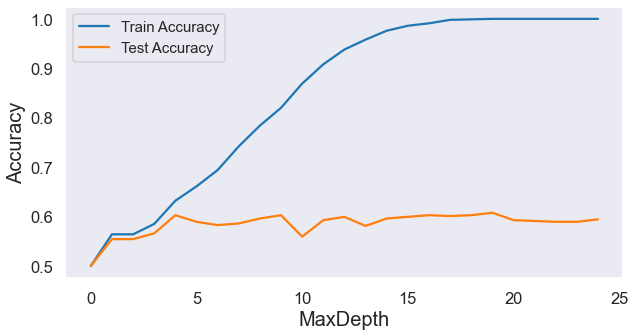

In [27]:
# create two plots using matplotlib and seaborn 
plt.figure(figsize=(10,5))
sns.set_style("dark")
sns.set_context("talk")
plt.plot(train_accuracies,label="Train Accuracy")
plt.plot(test_accuracies,label="Test Accuracy")
plt.legend(loc="upper left", prop={'size':15})
plt.xticks(range(0, 26, 5))
plt.xlabel("MaxDepth",size=20)
plt.ylabel("Accuracy",size=20)
plt.show()

We see that the best score for test data is obtained when max_depth has a value of 9. As we keep increasing the value of this parameter, test accuracy remains the same or gets worse, but the training accuracy keeos increasing, It means that our simple decision tree model keeps learning about training data better and better with an increase in max_depth, but the performance on test data does not improve at all. This is called overfitting
